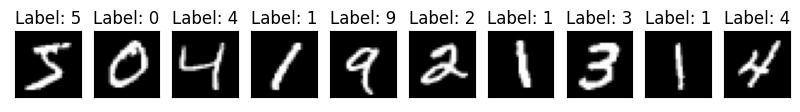

In [48]:
%run './Main.ipynb'

In [49]:
class AutoEncoder(tf.keras.Model):
    def __init__(self, num_hidden=8):
        super(AutoEncoder, self).__init__()
        self.num_hidden = num_hidden

        # Define the encoder part of the autoencoder
        self.encoder = models.Sequential([
            layers.Input(shape=(784,)),
            layers.Dense(256, activation='relu'),  # input size: 784, output size: 256
            layers.Dense(self.num_hidden, activation='relu')  # input size: 256, output size: num_hidden
        ])

        # Define the decoder part of the autoencoder
        self.decoder = models.Sequential([
            layers.Input(shape=(self.num_hidden,)),
            layers.Dense(256, activation='relu'),  # input size: num_hidden, output size: 256
            layers.Dense(784, activation='sigmoid')  # input size: 256, output size: 784 with sigmoid activation
        ])

    def call(self, x):
        # Pass the input through the encoder
        encoded = self.encoder(x)
        # Pass the encoded representation through the decoder
        decoded = self.decoder(encoded)
        return encoded, decoded

# Create an instance of the AutoEncoder
autoencoder = AutoEncoder()

# Compile the model if needed
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# You can then train and evaluate the model as needed using TensorFlow/Keras functionality.

In [50]:
# Convert the training data to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_train = tf.reshape(X_train, (X_train.shape[0], 784))

# Create the autoencoder model
autoencoder = AutoEncoder()  # Assuming you've already defined the AutoEncoder class

# Define the optimizer
learning_rate = 0.001  # Adjust the learning rate as needed
optimizer = tf.keras.optimizers.Adam(learning_rate)

# Define the loss function
criterion = tf.keras.losses.MeanSquaredError()

# Create a dataset to handle batching of the training data
batch_size = 64  # Adjust the batch size as needed
train_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_dataset = train_dataset.batch(batch_size).shuffle(buffer_size=len(X_train))

In [58]:
num_epochs = 10  # Set the number of training epochs
losses = []
for epoch in range(num_epochs):
    total_loss = 0.0
    for batch in train_dataset:
        with tf.GradientTape() as tape:
            encoded, decoded = autoencoder(batch)
            loss = criterion(batch, decoded)
        gradients = tape.gradient(loss, autoencoder.trainable_variables)
        optimizer.apply_gradients(zip(gradients, autoencoder.trainable_variables))

        # Update the running loss
        total_loss += loss.numpy()

    # Print the epoch loss
    epoch_loss = total_loss / len(train_dataset)
    losses.append(epoch_loss)
    print("Epoch {}/{}: loss={:.4f}".format(epoch + 1, num_epochs, epoch_loss))
    
    
    

Epoch 1/10: loss=0.0313
Epoch 2/10: loss=0.0284
Epoch 3/10: loss=0.0269
Epoch 4/10: loss=0.0245
Epoch 5/10: loss=0.0233
Epoch 6/10: loss=0.0227
Epoch 7/10: loss=0.0222
Epoch 8/10: loss=0.0219
Epoch 9/10: loss=0.0216
Epoch 10/10: loss=0.0213


In [59]:
def plot_loss_curve(losses):
    """
    Plot the loss curve.

    Parameters:
    - losses: A list or array of loss values for each epoch.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(losses, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss / Epoches')
    plt.grid()
    plt.show()

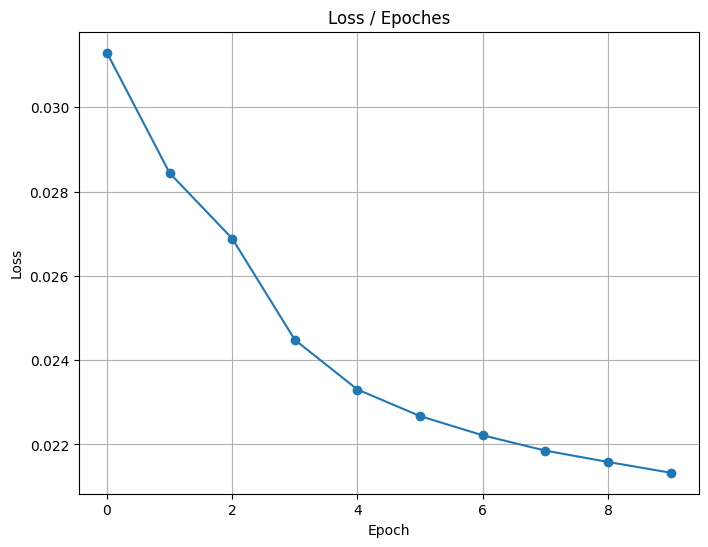

In [60]:
plot_loss_curve(losses)

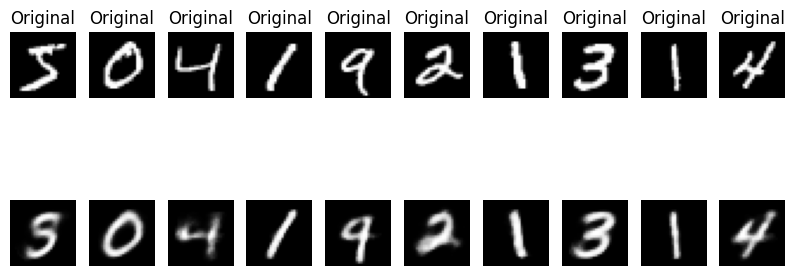

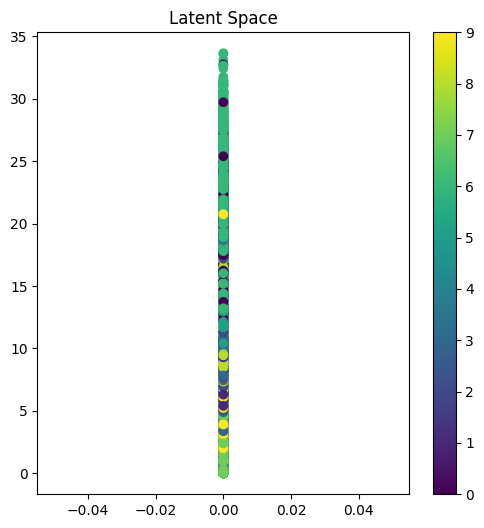

In [61]:
import matplotlib.pyplot as plt

# Function to display the original and reconstructed images
def show_original_and_reconstructed_images(original, reconstructed):
    n = original.shape[0]
    plt.figure(figsize=(10, 4))
    for i in range(n):
        # Original images
        plt.subplot(2, n, i + 1)
        plt.imshow(original[i].numpy().reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title('Original')

        # Reconstructed images
        plt.subplot(2, n, i + n + 1)
        plt.imshow(reconstructed[i].numpy().reshape(28, 28), cmap='gray')
        plt.axis('off')
#         plt.title('Reconstructed')
    plt.show()

# Function to display the latent space
def show_latent_space(latent_space):
    plt.figure(figsize=(6, 6))
    plt.scatter(latent_space[:, 0], latent_space[:, 1], c=y_train[:latent_space.shape[0]], cmap='viridis')
    plt.colorbar()
    plt.title('Latent Space')
    plt.show()

# Generate latent space and reconstructed images
latent_space, reconstructed_images = autoencoder(X_train)

# Display original and reconstructed images
show_original_and_reconstructed_images(X_train[:10], reconstructed_images[:10])

# Display the latent space
show_latent_space(latent_space)


In [62]:
latent_space.shape

TensorShape([60000, 8])

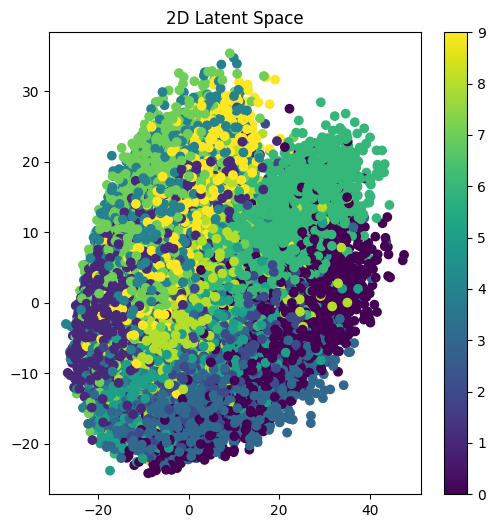

In [64]:
from sklearn.decomposition import PCA

# Reduce the 8D latent space to 2D for visualization
pca = PCA(n_components=2)
latent_space_2d = pca.fit_transform(latent_space)

# Display the 2D latent space
plt.figure(figsize=(6, 6))
plt.scatter(latent_space_2d[:, 0], latent_space_2d[:, 1], c=y_train[:latent_space_2d.shape[0]], cmap='viridis')
plt.colorbar()
plt.title('2D Latent Space')
plt.show()


In [ ]:
from sklearn.manifold import TSNE

# Reduce the 8D latent space to 2D using t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
latent_space_2d = tsne.fit_transform(latent_space)

# Plot the 2D latent space with labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_space_2d[:, 0], latent_space_2d[:, 1], c=y_train, cmap='viridis')

# Add labels to each cluster
for i in range(10):  # Assuming there are 10 classes (digits)
    x_mean = latent_space_2d[y_train == i].mean(axis=0)
    plt.text(x_mean[0], x_mean[1], str(i), fontsize=12, weight='bold')

plt.colorbar(scatter, ticks=range(10))
plt.title('2D Latent Space with Digit Labels')
plt.show()

/home/msa/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/msa/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
